In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/disneyland-reviews/DisneylandReviews.csv


**KÜTÜPHANELERİN IMPORT EDİLMESİ**

Kullanılan bazı kütüphaneler import edildi

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter (action = 'ignore')

# **VERİLERİN OKUNMASI**

In [4]:
url = '../input/disneyland-reviews/DisneylandReviews.csv'
df = pd.read_csv(url, encoding="cp1252", na_values=['missing'])
df

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,NaN,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,NaN,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,NaN,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,NaN,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         40043 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


**Review_ID benzersiz olacağı için tekrarlanan veri olup olmadığına bakılması**

In [6]:
df.Review_ID.value_counts().head(21) 

Review_ID
121586148    2
164830205    2
129231609    2
168489234    2
226905150    2
121568004    2
121570980    2
129214104    2
121580686    2
164862064    2
121615136    2
121615246    2
121578357    2
166787635    2
166754595    2
166787525    2
166784597    2
129207323    2
166753649    2
166730734    2
103703490    1
Name: count, dtype: int64

In [7]:
df[df.Review_ID == 166787525] #örnek olarak birinin incelenmesi

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
24016,166787525,4,2013-7,Ireland,Was great. Disney could have done a better cro...,Disneyland_California
24024,166787525,4,2013-7,Ireland,Was great. Disney could have done a better cro...,Disneyland_California


 **Veri Düzenleme**

Year_Month sütununda 40043 non-null hücrenin olması diğer sütüunlarda da 42656 non-null olması,rE nedeniyle tekrar eden hücreler ve null olan veriler çıkartılır.

In [8]:
df = df.dropna().reset_index(drop=True)
df.drop_duplicates(subset='Review_ID', inplace=True, keep='first')
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40023 entries, 0 to 40022
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          40023 non-null  int64 
 1   Rating             40023 non-null  int64 
 2   Year_Month         40023 non-null  object
 3   Reviewer_Location  40023 non-null  object
 4   Review_Text        40023 non-null  object
 5   Branch             40023 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.8+ MB


df veri çerçevesindeki Review_Text (yorum metinleri) sütununda yer alan metin verisini makine öğrenmesi için uygun bir formatta sayısal verilere dönüştürülmesi
* CountVectorizer doğal dil işleme (NLP) için kullanılan bir araçtır ve metinleri "bag of words" (kelime çantası) modeline göre sayısal hale getirir.
* stop_words='english': İngilizce'deki anlam taşımayan, sık kullanılan kelimeler (örn. 'the', 'is') görmezden gelinilr.
* max_features=1000: Yorumlarda en sık geçen 1000 kelime seçilir ve sadece bunlar kullanılır.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X_count = count_vectorizer.fit_transform(df['Review_Text'])
df_count = pd.DataFrame(X_count.toarray(), columns=count_vectorizer.get_feature_names_out())
df = pd.concat([df, df_count], axis=1)

**Kategorik Verileri Sayısallaştırma**

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Reviewer_Location'] = le.fit_transform(df['Reviewer_Location'])
df['Branch'] = le.fit_transform(df['Branch'])


**Zaman içindeki ortalama puanların incelenmesi**

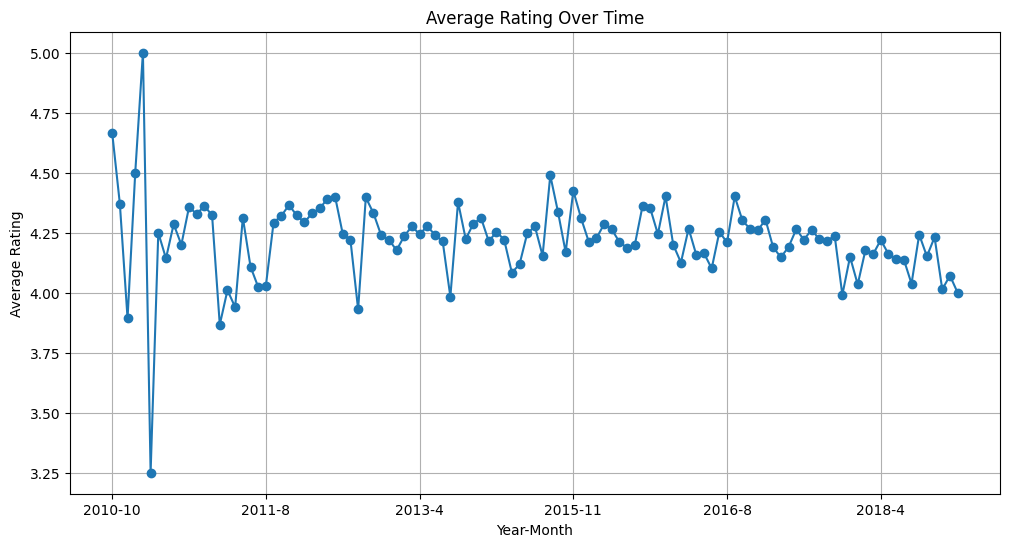

In [10]:
average_rating_per_month = df.groupby('Year_Month')['Rating'].mean()
plt.figure(figsize  = (12, 6))
average_rating_per_month.plot(marker = 'o')
plt.title('Average Rating Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

Year_Month sütunundaki tarih verisini işleyerek, yıl ve ay bilgilerini ayrı sütunlar olarak çıkartma amaçlanır. Çünkü yukarıda gösterieln grafikte sadece yılın değil yılın ve ayın  hangi zamandında gerçekleşen ziyaret de görüşleri etkilemektedir. Bu yüzden veri setindeki tarih bilgilerini yıl, ay ve yıl-ay kombinasyonu olarak ayrıştırılmıştır

In [11]:

# 'Year_Month' sütununu tarih formatına dönüştür
df['Year_Month'] = pd.to_datetime(df['Year_Month'], format='%Y-%m')

# Yıl ve Ay sütunlarını oluştur
df['Year'] = df['Year_Month'].dt.year
df['Month'] = df['Year_Month'].dt.month

# Yıl ve Ay kombinasyonu oluşturma
df['Year_Month_Combined'] = df['Year'].astype(str) + "_" + df['Month'].astype(str).str.zfill(2)




Sayı olmayan ve proje için lazım olunmayağı düşünülen Review_ID sütunlarının çıkartılması

In [12]:

df_cleaned = df.drop(columns=["Review_ID",'Review_Text',"Year_Month"])
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40023 entries, 0 to 40022
Columns: 1006 entries, Rating to Year_Month_Combined
dtypes: int32(2), int64(1003), object(1)
memory usage: 306.9+ MB


# Özellikler (features) ile hedef değişken olan Rating arasındaki korelasyonları inceleme

Korelasyon analizi, bir özelliğin hedef değişkenle ne kadar ilişkili olduğunu anlamak için kullanılır. Çıkan sonuca göre Review_Text deki  kelimeler ile rating ilişkilidir

In [18]:
correlation_matrix = df_cleaned.corr()

# Rating ile yüksek korelasyonları filtrele
rating_corr = correlation_matrix[['Rating']].sort_values(by='Rating', ascending=False)

# Korelasyonları içeren DataFrame'i oluştur
high_corr_rating = rating_corr[(rating_corr['Rating'] >= 0.05) & (rating_corr['Rating'] < 1.0)]

high_corr_rating_df = high_corr_rating.reset_index()
high_corr_rating_df.columns = ['Feature', 'Correlation']

print(high_corr_rating_df)

      Feature  Correlation
0     amazing     0.127381
1       loved     0.102305
2       great     0.100342
3     awesome     0.082868
4   wonderful     0.076738
5        love     0.076400
6   fantastic     0.076136
7     perfect     0.066147
8         fun     0.061549
9    favorite     0.058379
10    magical     0.057470
11       best     0.057309
12      blast     0.055605
13  fireworks     0.053988
14       ages     0.050262


**Ziyaret edilen şubelerin (Branch) ortalama puan skorları kaçtır? Ve ziyaret edilen şubelerin Rating i etkiler mi?**  


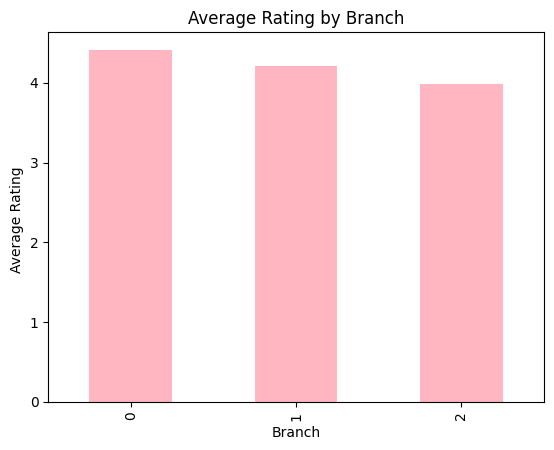

In [19]:
branch_ratings =df.groupby('Branch')['Rating'].mean()
branch_ratings.plot(kind='bar', color='lightpink')
plt.title('Average Rating by Branch')
plt.xlabel('Branch')
plt.ylabel('Average Rating ')
plt.show()

* 0: California
* 1: Hong- Kong
* 2: Paris

**Ziyaret edilen şubelerin (Branch)  her puan için skorları kaç tanedir?**

<Axes: xlabel='Rating', ylabel='count'>

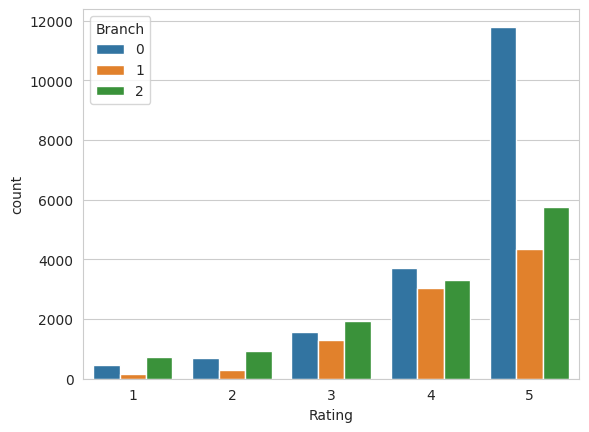

In [20]:
sns.set_style("whitegrid")
sns.countplot(x = 'Rating',hue = 'Branch',data=df)

* mavi sütun: hong-kong
* turuncu: california
* yeşil:paris

# Gözetimli Öğrenme Algoritmaları

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

**TRAIN VE TEST - SPLIT VE SCALING**

In [22]:
X = df_cleaned.drop(columns= ['Rating'])  # 'Rating' dışında tüm özellikler
y = df_cleaned['Rating']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
# Linear Regresyon
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_validate

model =LinearRegression()

model.fit(X_train, y_train)
y_test_p = model.predict(X_test)

# Test R-Kare Puanı
test_r2 = r2_score(y_test, y_test_p)

print(f"Model: LINEAR REGRESSION")
print(f"Test R - Squared Score: {test_r2:.5f}\n")

# Çapraz doğrulama
scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_absolute_percentage_error'],
                        cv=10, return_train_score=False)
scores_df = pd.DataFrame(scores, index=range(1, 11))

print(scores_df.iloc[:, 2:].mean().abs().apply("{:.5f}".format))
print("\n############################################################################\n")

Model: LINEAR REGRESSION
Test R - Squared Score: 0.39662

test_r2                                    0.38593
test_neg_mean_absolute_error               0.63193
test_neg_mean_squared_error                0.67364
test_neg_mean_absolute_percentage_error    0.21628
dtype: object

############################################################################



Bu skor, modelin bağımlı değişkenin (y_test) varyansının %39.66’sını açıkladığını gösterir. Yani model, veri setindeki değişkenliğin yaklaşık %40’ını açıklayabiliyor.

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
import pandas as pd

# Modeli oluştur ve eğit
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Test verisi ile tahmin yap
y_test_p = model.predict(X_test)

# Test doğruluk skoru
test_accuracy = accuracy_score(y_test, y_test_p)
print(f"Model: LOGISTIC REGRESSION")
print(f"Test Accuracy: {test_accuracy:.5f}\n")

# Test metriklerini hesapla
test_precision = precision_score(y_test, y_test_p, average='weighted')
test_recall = recall_score(y_test, y_test_p, average='weighted')
test_f1 = f1_score(y_test, y_test_p, average='weighted')

print(f"Test Precision: {test_precision:.5f}")
print(f"Test Recall: {test_recall:.5f}")
print(f"Test F1 Score: {test_f1:.5f}\n")

# Çapraz doğrulama
scores = cross_validate(model, X_train, y_train,
                        scoring=['accuracy', 'neg_mean_absolute_error', 'neg_mean_squared_error'],
                        cv=10, return_train_score=False)
scores_df = pd.DataFrame(scores, index=range(1, 11))

# Ortalama çapraz doğrulama skorları
mean_scores = scores_df.iloc[:, 2:].mean().abs().apply("{:.5f}".format)
print(mean_scores)
print("\n############################################################################\n")


Model: LOGISTIC REGRESSION
Test Accuracy: 0.61724

Test Precision: 0.57702
Test Recall: 0.61724
Test F1 Score: 0.58539

test_accuracy                   0.60847
test_neg_mean_absolute_error    0.50934
test_neg_mean_squared_error     0.81073
dtype: object

############################################################################



Bu skor, modelin test veri setindeki sınıflandırmalarının %61.72’sinin doğru olduğunu gösterir.


In [29]:
from sklearn.tree import DecisionTreeClassifier


# Decision Tree Classifier
model = DecisionTreeClassifier()

# Modeli eğitme
model.fit(X_train, y_train)

# Test verisi üzerinde tahmin
y_test_p = model.predict(X_test)

# Test seti üzerindeki metrikler
test_accuracy = accuracy_score(y_test, y_test_p)
test_precision = precision_score(y_test, y_test_p, average='weighted')  # Weighted for multiclass
test_recall = recall_score(y_test, y_test_p, average='weighted')        # Weighted for multiclass
test_f1 = f1_score(y_test, y_test_p, average='weighted')                # Weighted for multiclass

# Sonuçları yazdırma
print(f"Model: DECISION TREE")
print(f"Test Accuracy: {test_accuracy:.5f}")
print(f"Test Precision: {test_precision:.5f}")
print(f"Test Recall: {test_recall:.5f}")
print(f"Test F1 Score: {test_f1:.5f}\n")

# Çapraz doğrulama (10 katlamalı)
scores = cross_validate(model, X_train, y_train,
                        scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'neg_mean_absolute_error', 'neg_mean_squared_error'],
                        cv=10, return_train_score=False)

# Sonuçları DataFrame olarak saklama
scores_df = pd.DataFrame(scores, index=range(1, 11))

# Çapraz doğrulama sonuçlarının ortalamasını yazdırma
print("Cross-Validation Results (Mean of 10 Folds):")
print(f"Accuracy: {scores_df['test_accuracy'].mean():.5f}")
print(f"Precision: {scores_df['test_precision_weighted'].mean():.5f}")
print(f"Recall: {scores_df['test_recall_weighted'].mean():.5f}")
print(f"F1 Score: {scores_df['test_f1_weighted'].mean():.5f}")
print(f"Mean Absolute Error: {abs(scores_df['test_neg_mean_absolute_error'].mean()):.5f}")
print(f"Mean Squared Error: {abs(scores_df['test_neg_mean_squared_error'].mean()):.5f}\n")

print("\n############################################################################\n")


Model: DECISION TREE
Test Accuracy: 0.48057
Test Precision: 0.47772
Test Recall: 0.48057
Test F1 Score: 0.47889

Cross-Validation Results (Mean of 10 Folds):
Accuracy: 0.47776
Precision: 0.47138
Recall: 0.47776
F1 Score: 0.47436
Mean Absolute Error: 0.76491
Mean Squared Error: 1.42123


############################################################################



Test Doğruluk Skoru (Test Accuracy): 0.48007
Bu skor, modelin test veri setindeki sınıflandırmalarının %48.01’inin doğru olduğunu gösterir.

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_validate


# K-Nearest Neighbors Classifier
model = KNeighborsClassifier()

# Modeli eğitme
model.fit(X_train, y_train)

# Test verisi üzerinde tahmin
y_test_p = model.predict(X_test)

# Test seti üzerindeki metrikler
test_accuracy = accuracy_score(y_test, y_test_p)
test_precision = precision_score(y_test, y_test_p, average='weighted')  # Weighted for multiclass
test_recall = recall_score(y_test, y_test_p, average='weighted')        # Weighted for multiclass
test_f1 = f1_score(y_test, y_test_p, average='weighted')                # Weighted for multiclass

# Sonuçları yazdırma
print(f"Model: KNN")
print(f"Test Accuracy: {test_accuracy:.5f}")
print(f"Test Precision: {test_precision:.5f}")
print(f"Test Recall: {test_recall:.5f}")
print(f"Test F1 Score: {test_f1:.5f}\n")

# Çapraz doğrulama (10 katlamalı)
scores = cross_validate(model, X_train, y_train,
                        scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'neg_mean_absolute_error', 'neg_mean_squared_error'],
                        cv=10, return_train_score=False)

# Sonuçları DataFrame olarak saklama
scores_df = pd.DataFrame(scores, index=range(1, 11))

# Çapraz doğrulama sonuçlarının ortalamasını yazdırma
print("Cross-Validation Results (Mean of 10 Folds):")
print(f"Accuracy: {scores_df['test_accuracy'].mean():.5f}")
print(f"Precision: {scores_df['test_precision_weighted'].mean():.5f}")
print(f"Recall: {scores_df['test_recall_weighted'].mean():.5f}")
print(f"F1 Score: {scores_df['test_f1_weighted'].mean():.5f}")
print(f"Mean Absolute Error: {abs(scores_df['test_neg_mean_absolute_error'].mean()):.5f}")
print(f"Mean Squared Error: {abs(scores_df['test_neg_mean_squared_error'].mean()):.5f}\n")

print("\n############################################################################\n")


Model: KNN
Test Accuracy: 0.53904
Test Precision: 0.45124
Test Recall: 0.53904
Test F1 Score: 0.46681

Cross-Validation Results (Mean of 10 Folds):
Accuracy: 0.53411
Precision: 0.45020
Recall: 0.53411
F1 Score: 0.46193
Mean Absolute Error: 0.71869
Mean Squared Error: 1.43073


############################################################################



Bu skor, modelin test veri setindeki sınıflandırmalarının %53.90’ının doğru olduğunu gösterir.

In [34]:
# Lineer regresyon modeli oluşturma
model = LinearRegression()

In [35]:
# K-Fold Cross-validation uygulama (5 katlamalı)
from sklearn.model_selection import train_test_split, cross_val_score
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [36]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

ridge Regresyon modeli tanımlanıyor ve alpha=1.0 sabit ceza parametresi kullanılıyor. Ridge regresyon, fazla öğrenmeyi önlemek için modeldeki ağırlık katsayılarına ceza uygular.

In [37]:
# Sonuçları değerlendirme (MSE ve RMSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Ortalama Kare Hata (MSE): {mse}")
print(f"Kök Ortalama Kare Hata (RMSE): {rmse}")

Ortalama Kare Hata (MSE): 0.6897426810917343
Kök Ortalama Kare Hata (RMSE): 0.8305074840672625


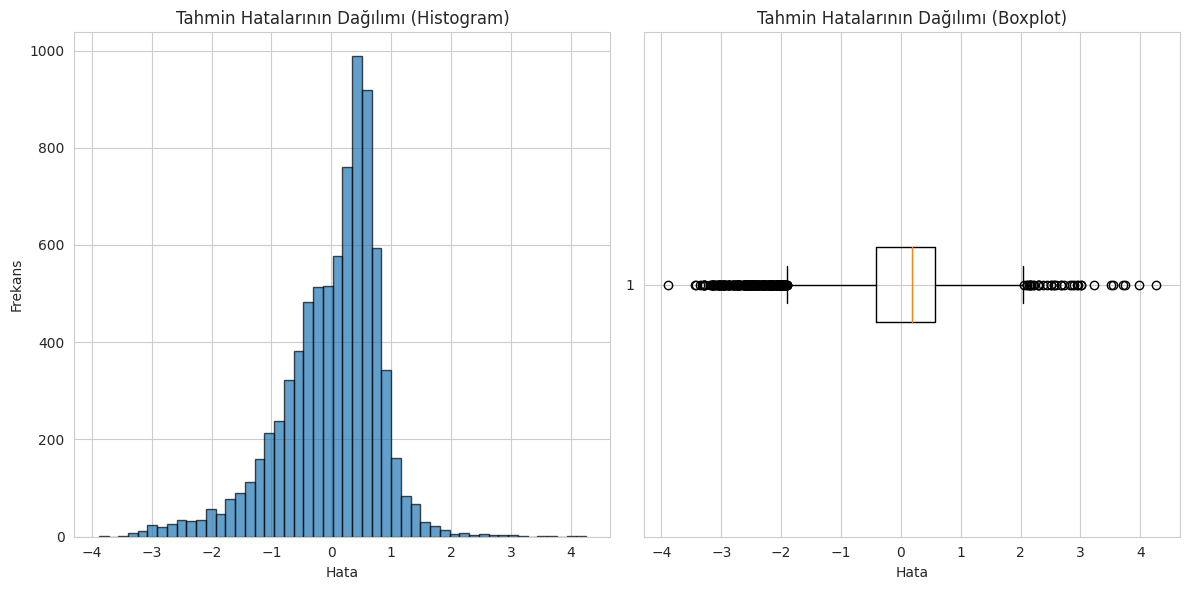

Hataların İstatistikleri:
Ortalama Hata:  0.00945620625635942
Medyan Hata:  0.19015892871119
Standart Sapma:  0.8305055236606439


In [38]:
import matplotlib.pyplot as plt

# Gerçek ve tahmin edilen değerler
errors = y_test - y_pred

# Hata dağılımını görselleştirme
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(errors, bins=50, edgecolor='k', alpha=0.7)
plt.title('Tahmin Hatalarının Dağılımı (Histogram)')
plt.xlabel('Hata')
plt.ylabel('Frekans')

# Hata değerlerinin istatistikleri
plt.subplot(1, 2, 2)
plt.boxplot(errors, vert=False)
plt.title('Tahmin Hatalarının Dağılımı (Boxplot)')
plt.xlabel('Hata')

plt.tight_layout()
plt.show()

# Hata değerlerinin bazı istatistiklerini görüntüleme
print("Hataların İstatistikleri:")
print("Ortalama Hata: ", errors.mean())
print("Medyan Hata: ", errors.median())
print("Standart Sapma: ", errors.std())

* Ortalama hata değeri oldukça düşük, bu da modelin genel tahminlerinin hedef değerlere oldukça yakın olduğunu gösteriyor
*  Medyan hata  makul görünüyor ve modelin çoğunlukla küçük hatalar yaptığını gösteriyor.
*  Standart sapma biraz yüksek

**Hiperparametre optimizasyonu Ridge modeli için:**

In [39]:
from sklearn.model_selection import GridSearchCV

# Test edilecek alpha değerleri
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}

# Ridge modeli ve GridSearchCV
ridge = Ridge()
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# En iyi alpha değerini bulmak için modeli eğit
grid_search.fit(X_train, y_train)

print(f"En iyi alpha: {grid_search.best_params_}")
print(f"En iyi skor: {-grid_search.best_score_}")


En iyi alpha: {'alpha': 100.0}
En iyi skor: 0.6776524155386687


ridge regresyon modelinin en iyi ceza parametresi alpha değerini bulmak için GridsearchCV kullanılır. Bu işlem farklı alpha değerleri deneyerek, 5 katlamalı cross-validation ile en düşük hataya sahip olanı seçer.alpha = 100 olduğu belirlenmiş.odelin aşırı karmaşık olmasını engelleyerek daha genel bir çözüm elde edilmiştir MSE = 0.6777 değerinin düşük olması, modelin doğruluğunun iyi olduğunu gösteriyor.

In [40]:
# Eğitim verisinde modelin performansı (MSE ve RMSE)
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)

# Test verisinde modelin performansı (MSE ve RMSE)
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

# Hataları yazdır
print(f"Eğitim Verisinde MSE: {mse_train}")
print(f"Eğitim Verisinde RMSE: {rmse_train}")
print(f"Test Verisinde MSE: {mse_test}")
print(f"Test Verisinde RMSE: {rmse_test}")


Eğitim Verisinde MSE: 0.6119775830579909
Eğitim Verisinde RMSE: 0.7822899609850499
Test Verisinde MSE: 0.6897426810917343
Test Verisinde RMSE: 0.8305074840672625


Hem eğitim hem de test verisi üzerinde MSE ve RMSE değerleri hesaplanarak, modelin performansı incelenir.Eğitim verisindeki hata 0.6119, test verisindeki hata 0.6897'dir. Eğitim ve test hataları birbirine yakın, bu da modelin iyi bir genelleme performansına sahip olduğunu, yani aşırı öğrenme yapmadığını gösteriyor. Eğitim verisi RMSE'si 0.7823 iken, test verisi RMSE'si yaklaşık 0.83 civarındadır. Bu iki değer arasındaki farkın küçük olması modelin genelleme yeteneğinin tatmin edici olduğunu ve overfitting yaşanmadığını gösteriyor.

In [41]:
from sklearn.model_selection import cross_validate
cv_scores_mean = -np.mean(cv_scores)
print(f"Cross-Validation MSE: {cv_scores_mean}")


Cross-Validation MSE: 0.6782301160225341


Cross-validation'dan elde edilen skorların ortalaması alınarak, modelin genel performansı değerlendirilir.Modelin genelleme yeteneğinin iyi olduğunu ve aşırı öğrenme (overfitting) veya yetersiz öğrenme (underfitting) gibi problemlerden kaçındığını gösteriyor.

**Lojistik Regresyon modeli ile hiperparametre optimizasyonu**

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Hiperparametre arama
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
log_reg = LogisticRegression(max_iter=1000)
X = df_cleaned.drop(columns=['Rating'])  # 'Rating' dışında tüm özellikler
y = df_cleaned['Rating']

# Verileri standartlaştırma
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# GridSearchCV ile optimizasyon
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# En iyi model ve skor
best_log_reg = grid_search.best_estimator_
print(f'Best Logistic Regression Parameters: {grid_search.best_params_}')
print(f'Best Logistic Regression Accuracy: {grid_search.best_score_}')

# Tahmin yapma
y_pred = best_log_reg.predict(X_scaled)

# Değerlendirme metrikleri
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='macro')  # Multi-class için macro ortalama
recall = recall_score(y, y_pred, average='macro')
f1 = f1_score(y, y_pred, average='macro')

# Sonuçları yazdırma
print(f"Accuracy: {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1 Score: {f1:.5f}")


Best Logistic Regression Parameters: {'C': 0.01}
Best Logistic Regression Accuracy: 0.5573557162705343
Accuracy: 0.66047
Precision: 0.59759
Recall: 0.50043
F1 Score: 0.53312


Logistic Regression modelinin doğruluk açısından iyi bir performans sergilemiştir ancak Precision ve Recall değerlerinin dengelenmediğini gösteriyor. Precision (doğru pozitif tahminlerin oranı) fena değil, ancak Recall (pozitif örneklerin ne kadarını doğru yakaladığı) düşük, bu da modelin bazı pozitif sınıfları yakalamada zorlandığını gösteriyor. F1 skoru, bu iki metriğin ortalamasını vererek modelin genel başarımını dengeli bir şekilde değerlendirmeyi sağlar, ve burada 0.5331 olarak hesaplanmış, bu da çok yüksek değil.

Logistic Regression: Kategorik verilerle çalışır ve sınıflandırma problemleri için uygundur. Burada doğruluk (%66) fena değil, ancak Recall (0.50043) düşük olduğundan model, sınıfların bazılarını kaçırıyor olabilir.
Ridge Regression: Sürekli verilerle çalışır ve regresyon problemleri için uygundur. Ridge regresyonunda elde edilen MSE ve RMSE değerleri, verilerzde çok büyük hatalar olmadığını gösteriyor. Ayrıca Ridge regresyonu, daha iyi genelleme yeteneği sunabilir çünkü aşırı uyumu (overfitting) azaltır.

# Gözetimsiz Öğrenme Algoritmaları

DATA temizlenmesi ve 

TRAIN & TEST // SPLIT & SCALING

In [17]:
data = df_cleaned.drop(columns=['Rating'])

In [18]:

x_train,x_test = train_test_split(data, test_size=0.2, random_state=42)

In [19]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# k-Means Kümeleme
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)

kmeans.fit(x_train)

y_pred =kmeans.predict(x_test)

# Silhouette Skoru
silhouette_avg = silhouette_score(x_test, y_pred)
print(f"Model: k-Means")
print(f"Silhouette Score: {silhouette_avg:.5f}\n")
print("\n############################################################################\n")


Model: k-Means
Silhouette Score: 0.50238


############################################################################



Bu değer, kümelerin oldukça belirgin olduğunu, ancak daha iyi olabileceğini gösterir. Kümeler arası ayrım kesin değil ama kabul edilebilir seviyede

In [48]:
# Apriori Algoritması
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

# Dummy veri oluşturma ve bool tipine çevirme
data = pd.DataFrame({
    'Item1': [1, 0, 1, 1, 0],
    'Item2': [1, 1, 0, 0, 1],
    'Item3': [0, 1, 1, 0, 1],
}).astype(bool)  # Veri tipini bool'a dönüştürüyoruz

# Apriori algoritmasını çalıştırma
frequent_itemsets = apriori(data, min_support=0.5, use_colnames=True)

# Association Rules oluşturma
rules =association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

print(f"Model: Apriori")
print(f"Frequent Itemsets:\n{frequent_itemsets}\n")
print(f"Association Rules:\n{rules}\n")
print("\n############################################################################\n")


Model: Apriori
Frequent Itemsets:
   support itemsets
0      0.6  (Item1)
1      0.6  (Item2)
2      0.6  (Item3)

Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


############################################################################



Item 1, Item 2, ve Item 3 verilerin %60ında bulunuyor. Bu, her bir öğenin sıklığının bu seviyede olduğunu gösterir.Association Rules kısmında boş bir DataFrame dönüyor. Bu, kuralların oluşturulmadığını veya belirlenen eşiklere (confidence) göre hiçbir kuralın geçerli olmadığını gösterir.

In [56]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

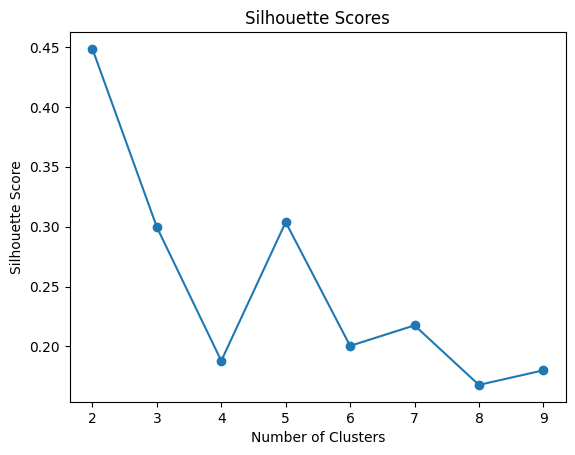

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Silhouette Skoru Grafiği
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


silhouette skor  n =2  deyken 0.45 çıkmaktadır.FutureWarning

In [27]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans

# Hiperparametre aralıkları
param_grid = {
    'n_clusters': range(2, 10),  # Küme sayısını aralıklı deniyoruz
    'init': ['k-means++', 'random'],  # Başlangıç noktaları için iki seçenek
    'max_iter': [300, 500, 1000],  # Maksimum iterasyon sayısı
    'n_init': [10]  # Varsayılan değeri açıkça belirtiyoruz
}

kmeans = KMeans(random_state=42)

# GridSearchCV ile parametre araması
grid_search = GridSearchCV(kmeans, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled)

# En iyi parametreler ve model
best_params = grid_search.best_params_
best_kmeans = grid_search.best_estimator_

print(f'Best Parameters: {best_params}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
 
 (çok uzun sürdüğü için colabda yürütüldü ve bu sonuç bulundu)
 
Best Parameters: {'init': 'k-means++', 'max_iter': 300, 'n_clusters': 2}    

In [ ]:
# En iyi K-Means modeliyle veriyi yeniden kümele
labels_best = best_kmeans.predict(X_train_scaled)

# Silhouette skoru ile değerlendirme
silhouette_best = silhouette_score(X_train_scaled, labels_best)
print(f'Silhouette Score for the best model: {silhouette_best}')


Silhouette Score for the best model: 0.45939769181282164

n=2 ve Silhouette Score'unuzun 0.459 olması, modelin iki küme arasında belirli bir ayrım sağlanıldığını, ancak iyileştirilmesi gereken alanlar olduğunu gösterir.